In [1]:
%load_ext lab_black

# install packages

## install `lagranto` fortran package

Edit `install.csh`:
- line 24, set compiler and ignore type missmatch `setenv FORTRAN "gfortran -fallow-argument-mismatch"`
- line 27, set use of cdo `set ncdf = cdo`
- line 43, comment out `exit 1` so that we can use the above `FORTRAN` definition
- line 81, set `tools = ""`, it appears that these "tools" are actually in "goodies", and we don't need them
- `mkdir lagranto.ecmwf/tools`, directory must be present

In [2]:
parts = """
clean
lib
create_startf
caltra
trace
select
density
lidar
goodies
tools
links
""".split()
parts

['clean',
 'lib',
 'create_startf',
 'caltra',
 'trace',
 'select',
 'density',
 'lidar',
 'goodies',
 'tools',
 'links']

In [3]:
for part in parts:
    !LAGRANTO=`pwd` DYN_TOOLS=`pwd` csh -c "./lagranto.ecmwf/install.csh {part}"

-----------------------------------------------------------------
Installing libraries
-----------------------------------------------------------------
 ioinp_cdo.f -> ioinp.f
gfortran -fallow-argument-mismatch -c -O iotra.f
ar: creating iotra.a
gfortran -fallow-argument-mismatch -c -O ioinp.f
ar: creating ioinp.a
gfortran -fallow-argument-mismatch -c -O inter.f
ar: creating inter.a
gfortran -fallow-argument-mismatch -c -O times.f
ar: creating times.a
gfortran -fallow-argument-mismatch -c -O libcdfio.f
libcdfio.f:995:37:

  995 |           call ncvgt1(cdfid,idtime,i,inttime,ierr)
      |                                     1
......
 1135 |         call ncvgt1(cdfid,idtime,i,timeval,ierr)
      |                                   2  
libcdfio.f:1406:31:

  814 |       call ncvinq(cdfid,id,vnam,vartyp,ndim,vardim,nvatts,error)
      |                           2    
......
 1406 |       call ncvinq(cdfid,idtime,dimnam,vtyp,dn,dims,natt,ierr)
      |                               1
libcd

In [4]:
! ls lagranto.ecmwf/bin

caltra		     extract.ecmwf	 lidar.sh	 select
caltra.ecmwf	     extract.sh		 list2lsl	 select.ecmwf
caltra.sh	     getmima		 list2lsl.ecmwf  select.sh
changet		     getmima.ecmwf	 list2lsl.sh	 seltra
changet.ecmwf	     getmima.sh		 lsl2list	 seltra.ecmwf
changet.sh	     gettidiff		 lsl2list.ecmwf  seltra.sh
create_startf	     gettidiff.ecmwf	 lsl2list.sh	 startf
create_startf.ecmwf  gettidiff.sh	 lsl2rdf	 startf.ecmwf
create_startf.sh     getvars		 lsl2rdf.ecmwf	 startf.sh
datelist	     getvars.ecmwf	 lsl2rdf.sh	 timeres
datelist.ecmwf	     getvars.sh		 mergetra	 timeres.ecmwf
datelist.sh	     lagranto		 mergetra.ecmwf  timeres.sh
density		     lagranto.ecmwf	 mergetra.sh	 trace
density.ecmwf	     lagrantohelp	 newtime	 trace.ecmwf
density.sh	     lagrantohelp.ecmwf  newtime.ecmwf	 trace.sh
difference	     lagrantohelp.sh	 newtime.sh	 trainfo
difference.ecmwf     lagranto.sh	 reformat	 trainfo.ecmwf
difference.sh	     lidar		 reformat.ecmwf  trainfo.sh
extract		     lidar.ecmwf	 reforma

## Install python package

In [5]:
%%capture
!mamba install -c conda-forge cartopy -y

In [6]:
%%capture
!python -m pip install lagranto

# Create trajectory

In [121]:
import datetime
from pathlib import Path
import xarray as xr

import lagranto
import lagtraj
import lagtraj.trajectory.load
import lagtraj.domain.load

In [3]:
lagranto.__version__, lagtraj.__version__

('0.3.1', '0.1.1')

In [130]:
traj_definition = lagtraj.trajectory.load.load_definition(
    root_data_path="../", name="lagtraj://eurec4a_20200202_first_short_press"
)
traj_definition

TrajectoryDefinition(domain='lagtraj://eurec4a_circle', duration=TrajectoryDuration(forward=datetime.timedelta(seconds=3600), backward=datetime.timedelta(seconds=10800)), origin=TrajectoryOrigin(lat=13.28639889, lon=-57.7166481, datetime=datetime.datetime(2020, 2, 2, 12, 12)), name='lagtraj://eurec4a_20200202_first_short_press', type='lagrangian', timestep='domain_data', extra_kwargs={'velocity_method': 'single_pressure_level', 'velocity_method_kwargs': {'pressure': 95000.0}}, version='1.0.0')

In [131]:
domain_defn = lagtraj.domain.load.load_definition(
    domain_name=traj_definition.domain, data_path="../"
)
domain_defn

{'source': 'era5',
 'version': '1.0.0',
 'lat_min': 9.8,
 'lat_max': 16.8,
 'lon_min': -62.217,
 'lon_max': -54.217,
 'lat_samp': 0.1,
 'lon_samp': 0.1,
 'name': 'lagtraj://eurec4a_circle'}

In [132]:
tspan = (
    traj_definition.origin.datetime - traj_definition.duration.backward,
    traj_definition.origin.datetime + traj_definition.duration.forward,
)
tspan

(datetime.datetime(2020, 2, 2, 9, 12), datetime.datetime(2020, 2, 2, 13, 12))

In [133]:
domain_datadir = Path(
    f"../data/domains/{traj_definition.domain.replace('lagtraj://', '')}_data"
)
!ls -l {domain_datadir}

total 1550764
-rw-rw-r-- 1 leifdenby leifdenby 529466152 Dec  8 13:15 an_model_2020-02-02.nc
-rw-rw-r-- 1 leifdenby leifdenby 529466148 Dec  8 13:46 an_model_2020-02-03.nc
-rw-rw-r-- 1 leifdenby leifdenby  11053864 Dec  8 13:15 an_single_2020-02-02.nc
-rw-rw-r-- 1 leifdenby leifdenby  11053864 Dec  8 13:20 an_single_2020-02-03.nc
-rw-rw-r-- 1 leifdenby leifdenby  11053864 Dec  8 16:44 an_single_2020-02-09.nc
-rw-rw-r-- 1 leifdenby leifdenby  11053860 Dec  8 16:44 an_single_2020-02-10.nc
-rw-rw-r-- 1 leifdenby leifdenby  11053860 Dec  8 16:44 an_single_2020-02-11.nc
-rw-rw-r-- 1 leifdenby leifdenby      3897 Dec  8 17:04 data_requests.yaml
-rw-rw-r-- 1 leifdenby leifdenby 151277660 Dec  8 13:15 fc_model_2020-02-01.nc
-rw-rw-r-- 1 leifdenby leifdenby 151277660 Dec  8 13:15 fc_model_2020-02-02.nc
-rw-rw-r-- 1 leifdenby leifdenby 151277656 Dec  8 13:20 fc_model_2020-02-03.nc
-rw-rw-r-- 1 leifdenby leifdenby   6633272 Dec  8 13:15 fc_single_2020-02-01.nc
-rw-rw-r-- 1 leifdenby leifdenby   6

## make source ERA5 files for lagranto

In [134]:
ds_domain = lagtraj.domain.load.load_data(
    root_data_path="../data/", name=traj_definition.domain
)

/home/leifdenby/git-repos/lagtraj/lagtraj/domain/sources/era5/load.py:54: UserWarning: loaded ERA5 file `../data/domains/eurec4a_circle_data/an_single_2020-02-11.nc` was sorted by the `time` coordinate during load to handle out-of-order data in this file
  warnings.warn(
/home/leifdenby/git-repos/lagtraj/lagtraj/domain/sources/era5/load.py:54: UserWarning: loaded ERA5 file `../data/domains/eurec4a_circle_data/an_single_2020-02-02.nc` was sorted by the `time` coordinate during load to handle out-of-order data in this file
  warnings.warn(
/home/leifdenby/git-repos/lagtraj/lagtraj/domain/sources/era5/load.py:54: UserWarning: loaded ERA5 file `../data/domains/eurec4a_circle_data/an_single_2020-02-10.nc` was sorted by the `time` coordinate during load to handle out-of-order data in this file
  warnings.warn(
/home/leifdenby/git-repos/lagtraj/lagtraj/domain/sources/era5/load.py:54: UserWarning: loaded ERA5 file `../data/domains/eurec4a_circle_data/an_single_2020-02-09.nc` was sorted by the 

In [135]:
ds_domain.time

<xarray.DataArray '_temp' (time: 48)>
array(['2020-02-02T00:00:00.000000000', '2020-02-02T01:00:00.000000000',
       '2020-02-02T02:00:00.000000000', '2020-02-02T03:00:00.000000000',
       '2020-02-02T04:00:00.000000000', '2020-02-02T05:00:00.000000000',
       '2020-02-02T06:00:00.000000000', '2020-02-02T07:00:00.000000000',
       '2020-02-02T08:00:00.000000000', '2020-02-02T09:00:00.000000000',
       '2020-02-02T10:00:00.000000000', '2020-02-02T11:00:00.000000000',
       '2020-02-02T12:00:00.000000000', '2020-02-02T13:00:00.000000000',
       '2020-02-02T14:00:00.000000000', '2020-02-02T15:00:00.000000000',
       '2020-02-02T16:00:00.000000000', '2020-02-02T17:00:00.000000000',
       '2020-02-02T18:00:00.000000000', '2020-02-02T19:00:00.000000000',
       '2020-02-02T20:00:00.000000000', '2020-02-02T21:00:00.000000000',
       '2020-02-02T22:00:00.000000000', '2020-02-02T23:00:00.000000000',
       '2020-02-03T00:00:00.000000000', '2020-02-03T01:00:00.000000000',
       '2020-02-03T02:00:00.000000000', '2020-02-03T03:00:00.000000000',
       '2020-02-03T04:00:00.000000000', '2020-02-03T05:00:00.000000000',
       '2020-02-03T06:00:00.000000000', '2020-02-03T07:00:00.000000000',
       '2020-02-03T08:00:00.000000000', '2020-02-03T09:00:00.000000000',
       '2020-02-03T10:00:00.000000000', '2020-02-03T11:00:00.000000000',
       '2020-02-03T12:00:00.000000000', '2020-02-03T13:00:00.000000000',
       '2020-02-03T14:00:00.000000000', '2020-02-03T15:00:00.000000000',
       '2020-02-03T16:00:00.000000000', '2020-02-03T17:00:00.000000000',
       '2020-02-03T18:00:00.000000000', '2020-02-03T19:00:00.000000000',
       '2020-02-03T20:00:00.000000000', '2020-02-03T21:00:00.000000000',
       '2020-02-03T22:00:00.000000000', '2020-02-03T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2020-02-02 ... 2020-02-03T23:00:00
Attributes:
    long_name:  time

In [136]:
from lagtraj.domain.sources.era5.utils import ds_levels_coeffs

ds_levels_coeffs = ds_levels_coeffs.rename(dict(level="nhym"))
ds_levels_coeffs.a.attrs["units"] = "Pa"

ds_levels_coeffs

<xarray.Dataset>
Dimensions:  (nhym: 138)
Coordinates:
  * nhym     (nhym) int64 0 1 2 3 4 5 6 7 8 ... 130 131 132 133 134 135 136 137
Data variables:
    a        (nhym) float64 0.0 2.0 3.102 4.666 6.828 ... 22.84 3.758 0.0 0.0
    b        (nhym) float64 0.0 0.0 0.0 0.0 0.0 ... 0.992 0.995 0.9976 1.0

In [137]:
lagranto_vars = ["u", "v", "sp", "w"]
lagranto_workingdir = domain_datadir / "lagranto"
FILENAME_FORMAT = "P{time:%Y%m%d}_{time:%H}"
lagranto_dim_order = ("lon", "lat", "lev", "time")[::-1]

da_time = ds_domain.time

for t_isel in ds_domain.time.resample(time="6H").groups.values():
    # ds_subset = ds_domain[lagranto_vars].sel(time=(ds_domain.time.dt.date == g))
    ds_subset = ds_domain[lagranto_vars].sel(time=da_time.isel(time=t_isel))
    ds_subset = ds_subset.rename(dict(level="lev", u="U", v="V", w="OMEGA"))

    ds_subset["PS"] = ds_subset.sp / 100.0
    ds_subset = ds_subset.drop(["sp"])
    ds_subset["lev"].attrs["standard_name"] = "hybrid_sigma_pressure"
    ds_subset["hyam"] = ds_levels_coeffs["a"]
    ds_subset["hybm"] = ds_levels_coeffs["b"]

    ds_subset = ds_subset.sortby("lat")

    for v in ds_subset.data_vars:
        dims = [d for d in lagranto_dim_order if d in ds_subset[v].dims]
        ds_subset[v] = ds_subset[v].transpose(*dims)

    t0 = ds_subset.isel(time=0).time.data.astype("datetime64[s]").item()
    filename = FILENAME_FORMAT.format(time=t0)
    fp_lagranto = lagranto_workingdir / filename
    fp_lagranto.parent.mkdir(exist_ok=True, parents=True)
    print(filename)
    ds_subset.to_netcdf(fp_lagranto)

P20200202_00
P20200202_06
P20200202_12
P20200202_18
P20200203_00
P20200203_06
P20200203_12
P20200203_18


In [138]:
!ls -l {lagranto_workingdir}

total 222912
-rw-rw-r-- 1 leifdenby leifdenby 28528672 Dec  8 17:04 P20200202_00
-rw-rw-r-- 1 leifdenby leifdenby 28528672 Dec  8 17:04 P20200202_06
-rw-rw-r-- 1 leifdenby leifdenby 28528672 Dec  8 17:04 P20200202_12
-rw-rw-r-- 1 leifdenby leifdenby 28528672 Dec  8 17:04 P20200202_18
-rw-rw-r-- 1 leifdenby leifdenby 28528672 Dec  8 17:04 P20200203_00
-rw-rw-r-- 1 leifdenby leifdenby 28528672 Dec  8 17:05 P20200203_06
-rw-rw-r-- 1 leifdenby leifdenby 28528672 Dec  8 17:05 P20200203_12
-rw-rw-r-- 1 leifdenby leifdenby 28528672 Dec  8 17:05 P20200203_18


## run lagranto

In [139]:
# tspan = (datetime.datetime(2020, 2, 2, 10), datetime.datetime(2020, 2, 2, 12))
dates = [tspan]
lrun = lagranto.LagrantoRun(
    dates=dates,
    version="ecmwf",
    cmd_header="export LAGRANTO=`pwd`/lagranto.ecmwf PATH=$PATH:`pwd`/lagranto.ecmwf/bin/",
    workingdir=lagranto_workingdir,
    outputdir="output",
)

In [152]:
specifier = f"'box.eqd(-60,-55,12,16,100)@profile(850,500,10)@hPa'"
t_ref = traj_definition.origin.datetime
out_create_startf = lrun.create_startf(tspan[0], specifier)  # , tolist=True)
print(out_create_startf)

       *** START OF PREPROCESSOR CREATE_STARTF ***              
---- INPUT PARAMETERS ----------------------------------
Reference date        : 20200202_09
Specifier             : box.eqd(-60,-55,12,16,100)@profile(850,500,10)@hPa
Output file           : startf.4
---- DIRECTORIES AND PROGRAMS ---------------------------
PROGRAM CREATE_STARTF : /home/leifdenby/git-repos/lagtraj/notebooks/lagranto.ecmwf/startf/create_startf
PARAMETER file        : /tmp/tmpv1d4c9dg/create_startf.param
CRITERION file        : /tmp/tmpv1d4c9dg/create_startf.criterion
RUN directory         : /tmp/tmpv1d4c9dg
/home/leifdenby/git-repos/lagtraj/notebooks/lagranto.ecmwf/goodies/gettidiff 20200202_09 20200202_00
9
/home/leifdenby/git-repos/lagtraj/notebooks/lagranto.ecmwf/goodies/gettidiff 20200202_09 20200202_06
3
---- DATA FILES -----------------------------------------
Primary files                         : P20200202_06
                                      : P20200202_12
Secondary files                    

In [153]:
out_caltra = lrun.caltra(*dates[0])

LagrantoException: export LAGRANTO=`pwd`/lagranto.ecmwf PATH=$PATH:`pwd`/lagranto.ecmwf/bin/
    cd '/tmp/tmp58i3jt82'
     caltra.ecmwf 20200202_09 20200202_13 startf.4 lsl_2020020209.4 -j
    =========================================================
       *** START OF PREPROCESSOR CALTRA ***              
---- DIRECTORIES AND PROGRAMS ---------------------------
CDF directory         : /tmp/tmp58i3jt82
TRA directory         : /tmp/tmp58i3jt82
PROGRAM CALTRA        : /home/leifdenby/git-repos/lagtraj/notebooks/lagranto.ecmwf/caltra/caltra
PARAMETER file        : /tmp/tmp58i3jt82/caltra.param
---- OPTIONAL FLAGS -------------------------------------
Flag '-j'     -> 1 (user defined)
Flag '-p'     -> 0 (default)
---- TIME RANGE -----------------------------------------
Time range      : 20200202_09 -> 20200202_13
Time difference : 4 h
Direction       : f (1)
Reference date  : 20200202_09
---- INPUT FILES ----------------------------------------
20200202_06
20200202_12
20200202_18
Primary file prefix            : P
Secondary file prefix          : S
Time increment for input files : 6
# input files                  : 3
P files availability           : 1
S files availability           : 0
First input file               : 20200202_06 
Last input file                : 20200202_18 
---- VERTICAL WIND SCALING ------------------------------
Vertical scaling factor (wfactor)  : 100.
---- TIME STEPS -----------------------------------------
Trajectory calculation time step [min] : 30
Output time step [min]                 : 360
Start time relative to first file      : 20200202_06 + 3 
End time relative to first file        : 20200202_18 - 5 
---- START FILE -----------------------------------------
Start file                  : startf.4 
Format                      : trajectory file (4)
# coordinates (lon,lat,lev) : 300 
# columns                   : 5 
       *** END OF PREPROCESSOR CALTRA ***              
=========================================================
 =========================================================
               *** START OF PROGRAM CALTRA ***

 ---- INPUT PARAMETERS -----------------------------------

   Forward/Backward       :            1
   #input files           :            3
   First/last input file  : 20200202_06 ... 20200202_18
   time increment         :    6.00000000    
   Output file            : lsl_2020020209.4
   Time step (min)        :    30.0000000    
   Time shift (start,end) :   3.00   5.00
   Output time interval   :          360
   Jump flag              :            1
   Vertical wind (scale)  :    100.000000    
   Trajectory pos file    : startf.4
   # of trajectories      :          300
   # of output timesteps  :            1
   Input format           :            4
   Output format          :            4
   Periodicity            :    0.00000000    
   Time check             : no
   Isentropic trajectories: no           1
   Model-level trajs (2D) : no

 ---- FIXED NUMERICAL PARAMETERS -------------------------

   Numerical scheme       :            1
   Number of iterations   :            3
   Filename prefix        : P
   Missing data value     :   -999.000000    

 HIIII :D
 or here?
 or there?
 anywhere?
 ---- CONSTANT GRID PARAMETERS ---------------------------

   xmin,xmax     :   -62.2169991      -54.2169991    
   ymin,ymax     :    9.80000019       16.7999992    
   dx,dy         :   0.100000001       9.99999866E-02
   pollon,pollat :    0.00000000       90.0000000    
   nx,ny,nz      :           81          71         137
   per, hem      :    0.00000000               0

 ---- REFERENCE DATE---------- ---------------------------

  Reference time (year)  :        2020
                 (month) :           2
                 (day)   :           2
                 (hour)  :           9
                 (min)   :           0
  Time range             :         240  min

 HIIII :D
 or here?
 or there?
 anywhere?

 ---- TRAJECTORIES ----------- ---------------------------

  (file,time) :         P20200202_06    -3.00
 HIIII :D
 or here?
 or there?
 anywhere?
  (file,time) :         P20200202_12     3.00
 HIIII :D
 or here?
 or there?
 anywhere?
      -> Trajectory            1  leaves domain
      -> Trajectory            2  leaves domain
      -> Trajectory            3  leaves domain
      -> Trajectory            4  leaves domain
      -> Trajectory            5  leaves domain
      -> Trajectory            6  leaves domain
      -> Trajectory            7  leaves domain
      -> Trajectory            8  leaves domain
      -> Trajectory            9  leaves domain
      -> N>=10 trajectories leave domain
  (file,time) :         P20200202_18     9.00
 HIIII :D
 or here?
 or there?
 anywhere?

 ---- STATUS INFORMATION --------------------------------

   #leaving domain             300
   #staying in domain            0

               *** END OF PROGRAM CALTRA ***
 =========================================================
echo: No match.
echo: No match.
(standard_in) 2: syntax error


In [154]:
!ls output

startf.4  startf.startf


In [155]:
!file output/startf.4

output/startf.4: NetCDF Data Format data


In [156]:
ds_traj = xr.open_dataset("output/startf.4")
ds_traj

<xarray.Dataset>
Dimensions:   (time: 1, dimz_lon: 1, dimy_lon: 1, dimx_lon: 300,
               dimx_BASEDATE: 6)
Coordinates:
  * time      (time) float32 0.0
Dimensions without coordinates: dimz_lon, dimy_lon, dimx_lon, dimx_BASEDATE
Data variables:
    lon       (time, dimz_lon, dimy_lon, dimx_lon) float32 ...
    lat       (time, dimz_lon, dimy_lon, dimx_lon) float32 ...
    p         (time, dimz_lon, dimy_lon, dimx_lon) float32 ...
    level     (time, dimz_lon, dimy_lon, dimx_lon) float32 ...
    BASEDATE  (time, dimz_lon, dimy_lon, dimx_BASEDATE) float32 ...
Attributes:
    domxmin:              34275315000000.0
    domxmax:              -2.1603643e-19
    domymin:              3.0705e-41
    domymax:              4.5916e-41
    domzmin:              1e-45
    domzmax:              -2.1606743e-19
    constants_file_name:  startf.4_cst

In [145]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

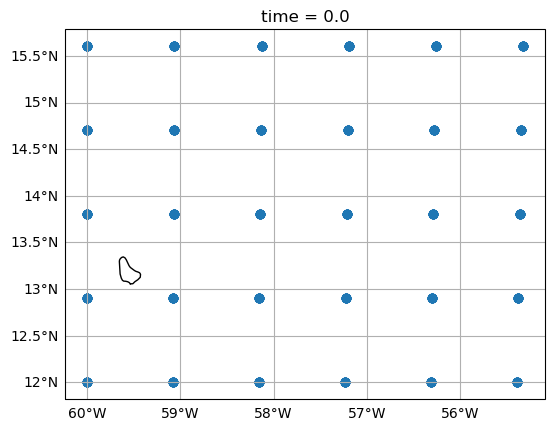

In [146]:
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.coastlines(resolution="10m")
ax.gridlines(draw_labels=["bottom", "left"])

xr.plot.scatter(ds_traj, x="lon", y="lat", transform=ccrs.PlateCarree())